## Face and Facial Keypoint detection

After you've trained a neural network to detect facial keypoints, you can then apply this network to *any* image that includes faces. The neural network expects a Tensor of a certain size as input and, so, to detect any face, you'll first have to do some pre-processing.

1. Detect all the faces in an image using a face detector (we'll be using a Haar Cascade detector in this notebook).
2. Pre-process those face images so that they are grayscale, and transformed to a Tensor of the input size that your net expects. This step will be similar to the `data_transform` you created and applied in Notebook 2, whose job was tp rescale, normalize, and turn any iimage into a Tensor to be accepted as input to your CNN.
3. Use your trained model to detect facial keypoints on the image.

---

In the next python cell we load in required libraries for this section of the project.

In [99]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline


#### Select an image 

Select an image to perform facial keypoint detection on; you can select any image of faces in the `images/` directory.

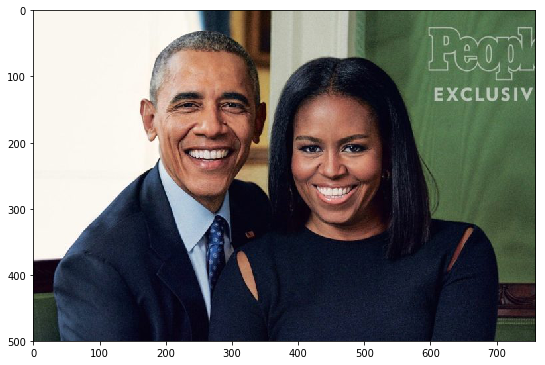

In [100]:
import cv2
# load in color image for face detection
image = cv2.imread('images/obamas.jpg')

# switch red and blue color channels 
# --> by default OpenCV assumes BLUE comes first, not RED as in many images
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# plot the image
fig = plt.figure(figsize=(9,9))
plt.imshow(image)

## Detect all faces in an image

Next, you'll use one of OpenCV's pre-trained Haar Cascade classifiers, all of which can be found in the `detector_architectures/` directory, to find any faces in your selected image.

In the code below, we loop over each face in the original image and draw a red square on each face (in a copy of the original image, so as not to modify the original). You can even [add eye detections](https://docs.opencv.org/3.4.1/d7/d8b/tutorial_py_face_detection.html) as an *optional* exercise in using Haar detectors.

An example of face detection on a variety of images is shown below.

<img src='images/haar_cascade_ex.png' width=80% height=80%/>


In [101]:
#harr cascade classifier
face_cascade=cv2.CascadeClassifier(r'C:\Users\Sarthak\Documents\Untitled Folder\Face detection project\detector_architectures\haarcascade_frontalface_default.xml')

#It contains coordinates of face
face=face_cascade.detectMultiScale(image,1.2,2)

image_with_detections = image.copy()

face

array([[371, 145, 160, 160],
       [179,  74, 174, 174]], dtype=int32)

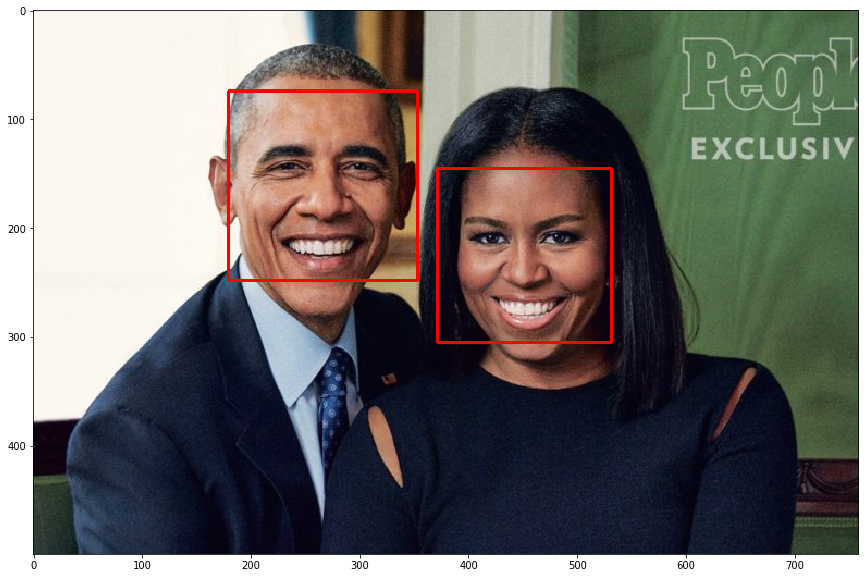

In [102]:
for (x,y,w,h) in face:
    cv2.rectangle(image_with_detections,(x,y),(x+w,y+h),(255,0,0),2)
    
fig=plt.figure(figsize=(20,10))
plt.imshow(image_with_detections)

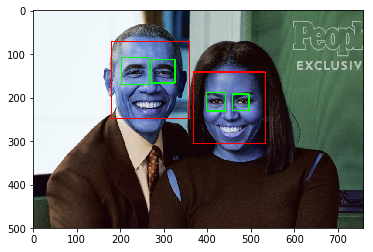

In [103]:
import numpy as np
import cv2 as cv
face_cascade = cv.CascadeClassifier(r'C:\Users\Sarthak\Documents\Untitled Folder\Face detection project\detector_architectures\haarcascade_frontalface_default.xml')
eye_cascade = cv.CascadeClassifier(r'C:\Users\Sarthak\Documents\Untitled Folder\Face detection project\detector_architectures\haarcascade_eye.xml')
img = cv.imread('images/obamas.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x,y,w,h) in faces:
    cv.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        
plt.imshow(img)

## Loading in a trained model

Once you have an image to work with (and, again, you can select any image of faces in the `images/` directory), the next step is to pre-process that image and feed it into your CNN facial keypoint detector.

First, load your best model by its filename.

In [104]:
import torch

from models import Net

net=Net()

net

Net(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (pool1): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool2): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  (lin1): Linear(in_features=12544, out_features=500, bias=True)
  (lin2): Linear(in_features=500, out_features=136, bias=True)
)

In [105]:
net.load_state_dict(torch.load('saved_models/keypoints_model_1.pt'))

## print out your net and prepare it for testing (uncomment the line below)
net.eval()

Net(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (pool1): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool2): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  (lin1): Linear(in_features=12544, out_features=500, bias=True)
  (lin2): Linear(in_features=500, out_features=136, bias=True)
)

## Keypoint detection

Now, we'll loop over each detected face in an image (again!) only this time, you'll transform those faces in Tensors that your CNN can accept as input images.

### TODO: Transform each detected face into an input Tensor

You'll need to perform the following steps for each detected face:
1. Convert the face from RGB to grayscale
2. Normalize the grayscale image so that its color range falls in [0,1] instead of [0,255]
3. Rescale the detected face to be the expected square size for your CNN (224x224, suggested)
4. Reshape the numpy image into a torch image.

You may find it useful to consult to transformation code in `data_load.py` to help you perform these processing steps.


### TODO: Detect and display the predicted keypoints

After each face has been appropriately converted into an input Tensor for your network to see as input, you'll wrap that Tensor in a Variable() and can apply your `net` to each face. The ouput should be the predicted the facial keypoints. These keypoints will need to be "un-normalized" for display, and you may find it helpful to write a helper function like `show_keypoints`. You should end up with an image like the following with facial keypoints that closely match the facial features on each individual face:

<img src='images/michelle_detected.png' width=30% height=30%/>




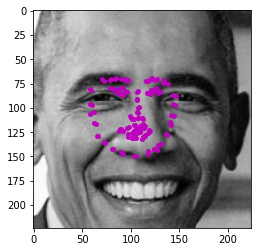

In [106]:
image_copy = np.copy(image)

# loop over the detected faces from your haar cascade
for (x,y,w,h) in face:
    
    # Select the region of interest that is the face in the image 
    roi = image_copy[y:y+h, x:x+w]
    
    ## TODO: Convert the face region from RGB to grayscale
    gray=cv2.cvtColor(roi,cv2.COLOR_RGB2GRAY)
    
    ## TODO: Normalize the grayscale image so that its color range falls in [0,1] instead of [0,255]
    gray=gray/255.0
    
    ## TODO: Rescale the detected face to be the expected square size for your CNN (224x224, suggested)
    gray_rescaled=cv2.resize(gray,(224,224))
    
    ## TODO: Reshape the numpy image shape (H x W x C) into a torch image shape (C x H x W)
    gray_tensor=torch.from_numpy(gray_rescsled).unsqueeze(0).unsqueeze(1)
    
    ## TODO: Make facial keypoint predictions using your loaded, trained network 
    gray_tensor=gray_tensor.type(torch.FloatTensor)
    output_pts=net.forward(gray_tensor)
    
    ## perform a forward pass to get the predicted facial keypoints

    ## TODO: Display each detected face and the corresponding keypoints        
    torch.squeeze(output_pts)
    output_pts=output_pts.view(68,-1)
    predicted_key_pts=output_pts.data.numpy()
    
    # undo normalization of keypoints
    predicted_key_pts = predicted_key_pts*50.0+100
    
    plt.imshow(gray_rescaled, cmap='gray')
    plt.scatter(predicted_key_pts[:, 0], predicted_key_pts[:, 1], s=60, marker='.', c='m')
    
plt.show()
    
    

In [107]:
output.shape

torch.Size([1, 136])

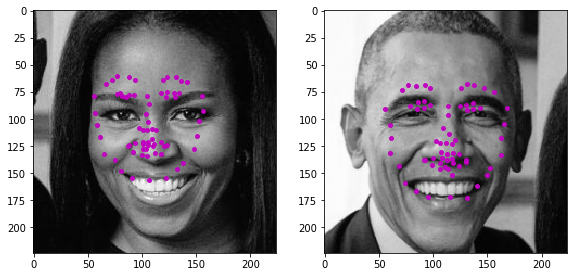

In [108]:
image_copy = np.copy(image)

plt.figure(figsize=(20,10))

# loop over the detected faces from your haar cascade
for i, (x,y,w,h) in enumerate(face):
    ax = plt.subplot(2, 4, i+1)
    
    wpad = int(w*0.2)
    hpad = int(h*0.2)
    
    # Select the region of interest that is the face in the image 
    roi = image_copy[y-hpad:y+h+hpad, x-wpad:x+w+wpad]
    
    ## TODO: Convert the face region from RGB to grayscale
    roi_copy = cv2.cvtColor(roi, cv2.COLOR_RGB2GRAY)

    ## TODO: Normalize the grayscale image so that its color range falls in [0,1] instead of [0,255]
    roi_copy = roi_copy/255.0
    
    ## TODO: Rescale the detected face to be the expected square size for your CNN (224x224, suggested)
    roi_copy = cv2.resize(roi_copy, (224, 224))

    ## TODO: Reshape the numpy image shape (H x W x C) into a torch image shape (C x H x W)
    # add batch dim and color channel!

    roi_tensor = torch.from_numpy(roi_copy.reshape(1,1,224,224))  # .transpose((2, 0, 1)))

    # convert images to FloatTensors
    roi_tensor = roi_tensor.type(torch.FloatTensor)

    ## TODO: Make facial keypoint predictions using your loaded, trained network 
    output_pts = net(roi_tensor)

    ## TODO: Display each detected face and the corresponding keypoints

    # un-transform the predicted key_pts data
    torch.squeeze(output_pts)             # remove batch dim
    output_pts = output_pts.view(68, -1)
    predicted_key_pts = output_pts.data.numpy()

    # undo normalization of keypoints  
    predicted_key_pts = predicted_key_pts*50.0+100
    
    plt.imshow(roi_copy, cmap='gray')
    plt.scatter(predicted_key_pts[:, 0], predicted_key_pts[:, 1], s=60, marker='.', c='m')
    
plt.show()